In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

base_path = "/content/drive/MyDrive/CustomOCR"
folders = ["datasets", "models", "results"]

for folder in folders:
    os.makedirs(os.path.join(base_path, folder), exist_ok=True)

print("Folder structure created.")


Folder structure created.


In [ ]:
import os

dataset_path = "/content/drive/MyDrive/CustomOCR/datasets"
files = [f for f in os.listdir(dataset_path) if f.lower().endswith((".jpg", ".jpeg", ".png"))]

print(f"Total images uploaded: {len(files)}")


Total images uploaded: 100


In [ ]:
import cv2
import os
import glob

input_folder = "/content/drive/MyDrive/CustomOCR/datasets"
output_folder = "/content/drive/MyDrive/CustomOCR/datasets_preprocessed"
os.makedirs(output_folder, exist_ok=True)

image_extensions = ["*.jpg", "*.jpeg", "*.png"]
image_paths = []
for ext in image_extensions:
    image_paths.extend(glob.glob(os.path.join(input_folder, ext)))

for path in image_paths:
    img = cv2.imread(path)
    if img is None:
        print(f"Warning: Could not read {path}")
        continue
    resized = cv2.resize(img, (416, 416))
    filename = os.path.basename(path)
    cv2.imwrite(os.path.join(output_folder, filename), resized)

print(f"Resized {len(image_paths)} images.")


Resized 100 images.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install ultralytics
from ultralytics import YOLO


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
!pip install -r requirements.txt  # install dependencies



fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5


In [ ]:
'''import os
import random
import shutil
from pathlib import Path

# Configuration
base_dir = Path("/content/drive/MyDrive/CustomOCR/datasets_preprocessed")
images_dir = base_dir / "images"
labels_dir = base_dir / "labels"

train_img_dir = images_dir / "train"
val_img_dir = images_dir / "val"
train_lbl_dir = labels_dir / "train"
val_lbl_dir = labels_dir / "val"

split_ratio = 0.8  # 80% train, 20% val

# Ensure train/val directories exist
for d in [train_img_dir, val_img_dir, train_lbl_dir, val_lbl_dir]:
    d.mkdir(parents=True, exist_ok=True)

# List all image files
image_files = list((images_dir).glob("*.jpg")) + list((images_dir).glob("*.png"))

# Shuffle and split
random.shuffle(image_files)
split_idx = int(len(image_files) * split_ratio)
train_files = image_files[:split_idx]
val_files = image_files[split_idx:]

def copy_files(image_list, target_img_dir, target_lbl_dir):
    for img_path in image_list:
        label_path = labels_dir / (img_path.stem + ".txt")

        if img_path.exists():
            shutil.move(str(img_path), str(target_img_dir / img_path.name))

        if label_path.exists():
            shutil.move(str(label_path), str(target_lbl_dir / label_path.name))

# Move files
copy_files(train_files, train_img_dir, train_lbl_dir)
copy_files(val_files, val_img_dir, val_lbl_dir)

print(f"✅ Done. {len(train_files)} images for training, {len(val_files)} for validation.")'''


✅ Done. 0 images for training, 0 for validation.


In [ ]:
import os
import shutil
import random
from glob import glob

# Define base path
base_path = '/content/drive/MyDrive/CustomOCR/datasets_preprocessed'

# Get all image files from root dir
image_paths = glob(os.path.join(base_path, '*.jpg'))
random.shuffle(image_paths)

# Create train/val splits
split_ratio = 0.8
split_index = int(len(image_paths) * split_ratio)
train_images = image_paths[:split_index]
val_images = image_paths[split_index:]

# Define target folders
folders = {
    'image_train': os.path.join(base_path, 'images/train'),
    'image_val': os.path.join(base_path, 'images/val'),
    'label_train': os.path.join(base_path, 'labels/train'),
    'label_val': os.path.join(base_path, 'labels/val'),
}

# Create folders if they don't exist
for folder in folders.values():
    os.makedirs(folder, exist_ok=True)

# Move function
def move_files(images, image_out, label_out):
    for img_path in images:
        img_name = os.path.basename(img_path)
        label_name = img_name.replace('.jpg', '.txt')
        label_path = os.path.join(base_path, label_name)

        # Move image
        shutil.move(img_path, os.path.join(image_out, img_name))

        # Move label if exists
        if os.path.exists(label_path):
            shutil.move(label_path, os.path.join(label_out, label_name))
        else:
            print(f"⚠️ Label missing for: {img_name}")

# Move files
move_files(train_images, folders['image_train'], folders['label_train'])
move_files(val_images, folders['image_val'], folders['label_val'])

print(f"✅ Done. {len(train_images)} training images, {len(val_images)} validation images.")


✅ Done. 80 training images, 20 validation images.


In [ ]:
'''custom_yaml = """
train: /content/drive/MyDrive/CustomOCR/datasets_preprocessed/images/train
val: /content/drive/MyDrive/CustomOCR/datasets_preprocessed/images/val

nc: 7
names: ['name', 'age', 'gender', 'test', 'technology', 'values', 'units']
"""

with open('/content/custom.yaml', 'w') as f:
    f.write(custom_yaml)

print("✅ custom.yaml created at /content/custom.yaml")'''


✅ custom.yaml created at /content/custom.yaml


In [ ]:
custom_yaml_path = "/content/custom.yaml"

with open(custom_yaml_path, "w") as f:
    f.write("""train: /content/drive/MyDrive/CustomOCR/datasets_preprocessed/images/train
val: /content/drive/MyDrive/CustomOCR/datasets_preprocessed/images/val

nc: 7
names: ['name', 'age', 'gender', 'test', 'technology', 'values', 'units']
""")

print(f"✅ Updated {custom_yaml_path}")


✅ Updated /content/custom.yaml


In [ ]:
!cat /content/custom.yaml


train: /content/drive/MyDrive/CustomOCR/datasets_preprocessed/images/train
val: /content/drive/MyDrive/CustomOCR/datasets_preprocessed/images/val

nc: 7
names: ['name', 'age', 'gender', 'test', 'technology', 'values', 'units']


In [ ]:
%env WANDB_MODE=disabled

!python train.py \
  --img 416 \
  --batch 16 \
  --epochs 50 \
  --data /content/custom.yaml \
  --cfg models/yolov5s.yaml \
  --weights yolov5s.pt \
  --name custom_yolov5


env: WANDB_MODE=disabled
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-05-15 10:18:32.484909: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747304312.509750   15413 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747304312.516949   15413 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=models/yolov5s.yaml, data=/content/custom.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None

In [ ]:
!mkdir -p /content/drive/MyDrive/CustomOCR/models


In [ ]:
!cp runs/train/custom_yolov52/weights/best.pt /content/drive/MyDrive/CustomOCR/models/best.pt
!cp runs/train/custom_yolov52/weights/last.pt /content/drive/MyDrive/CustomOCR/models/last.pt


In [ ]:
!python /content/yolov5/detect.py \
  --weights /content/drive/MyDrive/CustomOCR/models/best.pt \
  --img 416 \
  --conf 0.25 \
  --source /content/drive/MyDrive/CustomOCR/test_images


detect: weights=['/content/drive/MyDrive/CustomOCR/models/best.pt'], source=/content/drive/MyDrive/CustomOCR/test_images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-418-ga493afe1 Python-3.11.12 torch-2.6.0+cu124 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7029004 parameters, 0 gradients, 15.8 GFLOPs
image 1/5 /content/drive/MyDrive/CustomOCR/test_images/labtest1.png: 352x416 2 tests, 7 valuess, 1 units, 278.9ms
image 2/5 /content/drive/MyDrive/CustomOCR/test_images/labtest2.jpg: 416x320 1 test, 1 technology, 149.1ms
image 3/5 /content/drive/MyDrive/CustomOCR/test_images/labtest3.jpg: 352x

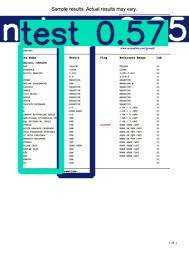

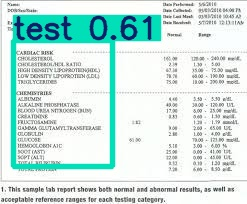

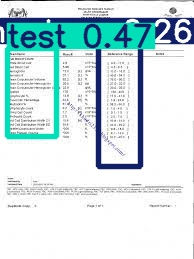

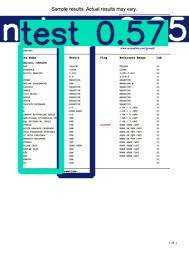

In [ ]:
from IPython.display import Image, display
import glob

result_images = glob.glob('/content/yolov5/runs/detect/exp2/*.jpg')

for img_path in result_images:
    display(Image(filename=img_path))


In [ ]:
!apt install tesseract-ocr -y
!pip install pytesseract opencv-python-headless pandas


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [ ]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define the dataset folder path
dataset_path = '/content/drive/MyDrive/CustomOCR/datasets'

# List image files
image_files = [f for f in os.listdir(dataset_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
print("Images found:", image_files)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Images found: ['thyrocare_0_1174.jpg', 'thyrocare_0_1001.jpg', 'thyrocare_0_5074.jpg', 'thyrocare_0_5338.jpg', 'thyrocare_0_5640.jpg', 'thyrocare_0_5858.jpg', 'thyrocare_0_5879.jpg', 'thyrocare_0_5928.jpg', 'thyrocare_0_6716.jpg', 'thyrocare_0_6723.jpg', 'thyrocare_0_6743.jpg', 'thyrocare_0_6884.jpg', 'thyrocare_0_7075.jpg', 'thyrocare_0_7082.jpg', 'thyrocare_0_7083.jpg', 'thyrocare_0_7109.jpg', 'thyrocare_0_7219.jpg', 'thyrocare_0_7571.jpg', 'thyrocare_0_7601.jpg', 'thyrocare_0_7635.jpg', 'thyrocare_0_7758.jpg', 'thyrocare_0_7791.jpg', 'thyrocare_0_7805.jpg', 'thyrocare_0_8214.jpg', 'thyrocare_0_8310.jpg', 'thyrocare_0_8394.jpg', 'thyrocare_0_8748.jpg', 'thyrocare_0_9047.jpg', 'thyrocare_0_8749.jpg', 'thyrocare_0_9076.jpg', 'thyrocare_0_9108.jpg', 'thyrocare_0_9207.jpg', 'thyrocare_0_9575.jpg', 'thyrocare_0_9447.jpg', 'thyrocare_0_9691.jpg', 'thyrocare_0_983

In [ ]:
import os
import pytesseract
from PIL import Image
import re
import csv

# Folder containing your images
image_folder = "/content/drive/MyDrive/CustomOCR/datasets"
output_csv = "/content/drive/MyDrive/CustomOCR/results.csv"

def extract_patient_info(text):
    name_line = None
    for line in text.splitlines():
        if "ASHIM" in line.upper():  # Adjust as needed
            name_line = line.strip()
            break
    if name_line:
        match = re.match(r"\d*\s*([A-Z ]+)\s*\((\d+)Y/.", name_line)
        if match:
            name = match.group(1).title().strip()
            age = match.group(2)
            gender = "Male"
            return {"name": name, "age": age, "gender": gender}
    return {"name": "Unknown", "age": "Unknown", "gender": "Unknown"}

def extract_tests(text):
    test_lines = []
    capture = False
    for line in text.splitlines():
        if "TEST NAME" in line.upper():
            capture = True
            continue
        if capture:
            if line.strip() == "" or "METHOD" in line.upper():
                break
            parts = [p for p in line.split(" ") if p]
            if len(parts) >= 4:
                test_name = " ".join(parts[:-3])
                value = parts[-3]
                unit = parts[-2]
                test_lines.append((test_name, value + " " + unit))
    return test_lines

# Save all results to CSV
with open(output_csv, "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["Image", "Name", "Age", "Gender", "Test Name", "Result"])

    for filename in os.listdir(image_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(image_folder, filename)
            print(f"🔍 Processing {filename}...")
            try:
                raw_text = pytesseract.image_to_string(Image.open(image_path))
                patient_info = extract_patient_info(raw_text)
                test_data = extract_tests(raw_text)
                for test_name, result in test_data:
                    writer.writerow([
                        filename,
                        patient_info["name"],
                        patient_info["age"],
                        patient_info["gender"],
                        test_name,
                        result
                    ])
            except Exception as e:
                print(f"❌ Error processing {filename}: {e}")

print(f"✅ All OCR results saved to: {output_csv}")


🔍 Processing thyrocare_0_1174.jpg...
🔍 Processing thyrocare_0_1001.jpg...
🔍 Processing thyrocare_0_5074.jpg...
🔍 Processing thyrocare_0_5338.jpg...
🔍 Processing thyrocare_0_5640.jpg...
🔍 Processing thyrocare_0_5858.jpg...
🔍 Processing thyrocare_0_5879.jpg...
🔍 Processing thyrocare_0_5928.jpg...
🔍 Processing thyrocare_0_6716.jpg...
🔍 Processing thyrocare_0_6723.jpg...
🔍 Processing thyrocare_0_6743.jpg...
🔍 Processing thyrocare_0_6884.jpg...
🔍 Processing thyrocare_0_7075.jpg...
🔍 Processing thyrocare_0_7082.jpg...
🔍 Processing thyrocare_0_7083.jpg...
🔍 Processing thyrocare_0_7109.jpg...
🔍 Processing thyrocare_0_7219.jpg...
🔍 Processing thyrocare_0_7571.jpg...
🔍 Processing thyrocare_0_7601.jpg...
🔍 Processing thyrocare_0_7635.jpg...
🔍 Processing thyrocare_0_7758.jpg...
🔍 Processing thyrocare_0_7791.jpg...
🔍 Processing thyrocare_0_7805.jpg...
🔍 Processing thyrocare_0_8214.jpg...
🔍 Processing thyrocare_0_8310.jpg...
🔍 Processing thyrocare_0_8394.jpg...
🔍 Processing thyrocare_0_8748.jpg...
🔍